# Tache 1 : Importation des modules


In [1]:
import missingno as msno
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

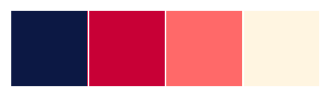

In [93]:
nutrition_palette = ['#0C1844','#C80036','#FF6969','#FFF5E1']
sns.set(palette= nutrition_palette)
sns.palplot(sns.color_palette())

In [2]:
Data = pd.read_csv('products.csv' , sep = "\t", parse_dates=['created_datetime','last_modified_datetime'], low_memory= False)

In [4]:
Data


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15 10:38:00+00:00,1561463718,2019-06-25 11:55:18+00:00,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13 21:06:14+00:00,1539464817,2018-10-13 21:06:57+00:00,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19 15:02:16+00:00,1574175737,2019-11-19 15:02:17+00:00,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11 14:09:21+00:00,1444659212,2015-10-12 14:13:32+00:00,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08 18:56:13+00:00,1560020173,2019-06-08 18:56:13+00:00,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109368,0041667038708,http://world-en.openfoodfacts.org/product/0041...,usda-ndb-import,1489071517,2017-03-09 14:58:37+00:00,1587584896,2020-04-22 19:48:16+00:00,"Pop Weaver, Slim Pop Microwave Popcorn",NaN,NaN,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109369,0041667038739,http://world-en.openfoodfacts.org/product/0041...,usda-ndb-import,1489074275,2017-03-09 15:44:35+00:00,1498399295,2017-06-25 14:01:35+00:00,"Pop Weaver, Slim Pop Microwave Popcorn",NaN,NaN,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109370,0041667051103,http://world-en.openfoodfacts.org/product/0041...,org-database-usda,1587655525,2020-04-23 15:25:25+00:00,1587655525,2020-04-23 15:25:25+00:00,Microwave popcorn,NaN,NaN,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109371,0041667051110,http://world-en.openfoodfacts.org/product/0041...,usda-ndb-import,1489074815,2017-03-09 15:53:35+00:00,1498399294,2017-06-25 14:01:34+00:00,"Pop Weaver, Microwave Popcorn, Light Butter",NaN,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### On va remplacer les tirets "-" en des tirets "_"
 

In [11]:
Data.columns = [col.replace("-","_") for col in Data.columns]

In [11]:
data_size = Data.shape
nb_rows = data_size[0]
nb_cols = data_size[1]
print(f'nbre de lignes sont {nb_rows}')
print(f'nbre de colonnes sont {nb_cols}')
print(f'Dimension de Data est {nb_rows*nb_cols}')

nbre de lignes sont 109373
nbre de colonnes sont 181
Dimension de Data est 19796513


# Les valeurs manquantes

In [12]:
len(Data['code'].unique())

109373

Les codes sont uniques


In [15]:
Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109373 entries, 0 to 109372
Data columns (total 181 columns):
 #    Column                                      Dtype              
---   ------                                      -----              
 0    code                                        object             
 1    url                                         object             
 2    creator                                     object             
 3    created_t                                   int64              
 4    created_datetime                            datetime64[ns, UTC]
 5    last_modified_t                             int64              
 6    last_modified_datetime                      datetime64[ns, UTC]
 7    product_name                                object             
 8    generic_name                                object             
 9    quantity                                    object             
 10   packaging                                 

Analyse des valeurs manquantes

In [29]:
missing_value = Data.isna().sum().sum()/Data.size
print(missing_value)
print(f'la pourcentage des valeurs manquantes: \t {round(missing_value * 100)}%')

0.7388060715541166
la pourcentage des valeurs manquantes: 	 74%


Missing value per column

In [32]:
missing_percentage_per_column  = Data.isnull().sum().sort_values(ascending=False)/nb_rows
missing_percentage_per_column


carnitine_100g           1.0
allergens_en             1.0
-cerotic-acid_100g       1.0
-lignoceric-acid_100g    1.0
-stearic-acid_100g       1.0
                        ... 
last_modified_t          0.0
created_datetime         0.0
created_t                0.0
creator                  0.0
code                     0.0
Length: 181, dtype: float64

<BarContainer object of 181 artists>

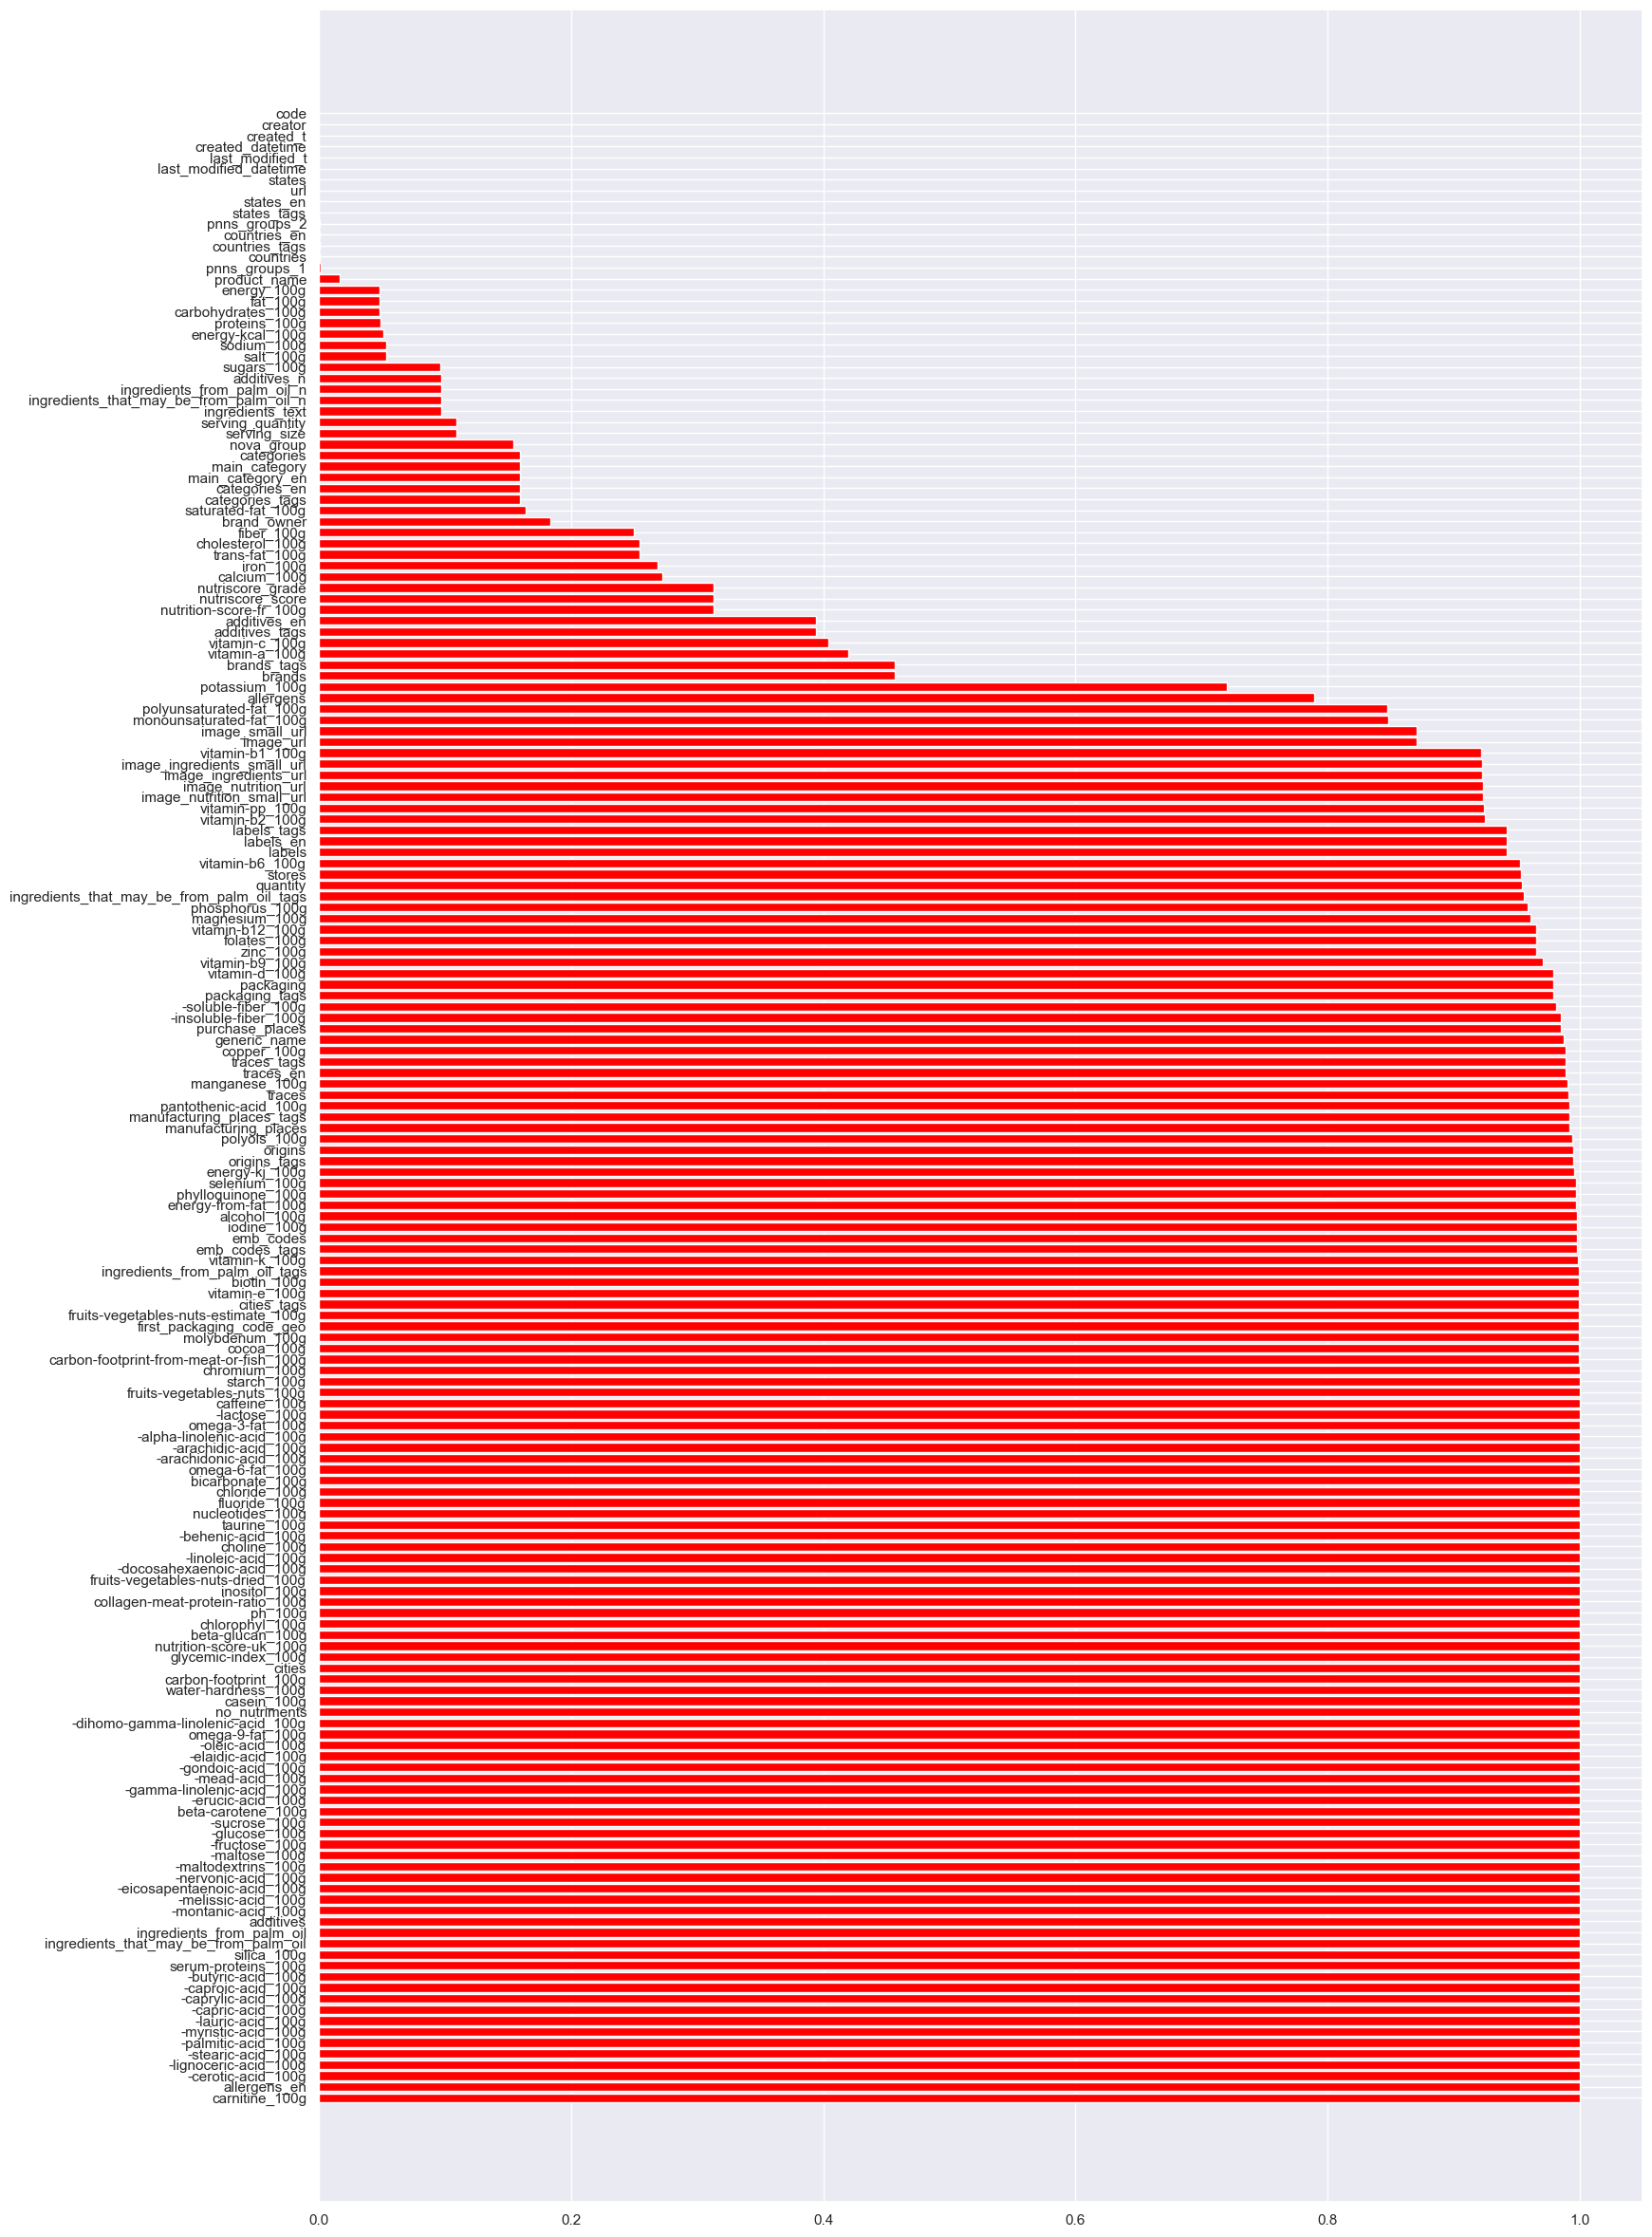

In [38]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(18,30))
plt.barh(missing_percentage_per_column.index,missing_percentage_per_column.values , color = 'red')

# supression des lignes et des colonnes 

In [41]:
columns_too_empty = missing_percentage_per_column[missing_percentage_per_column > 0.4].index
Data.drop(columns=columns_too_empty , inplace=True)


<Axes: >

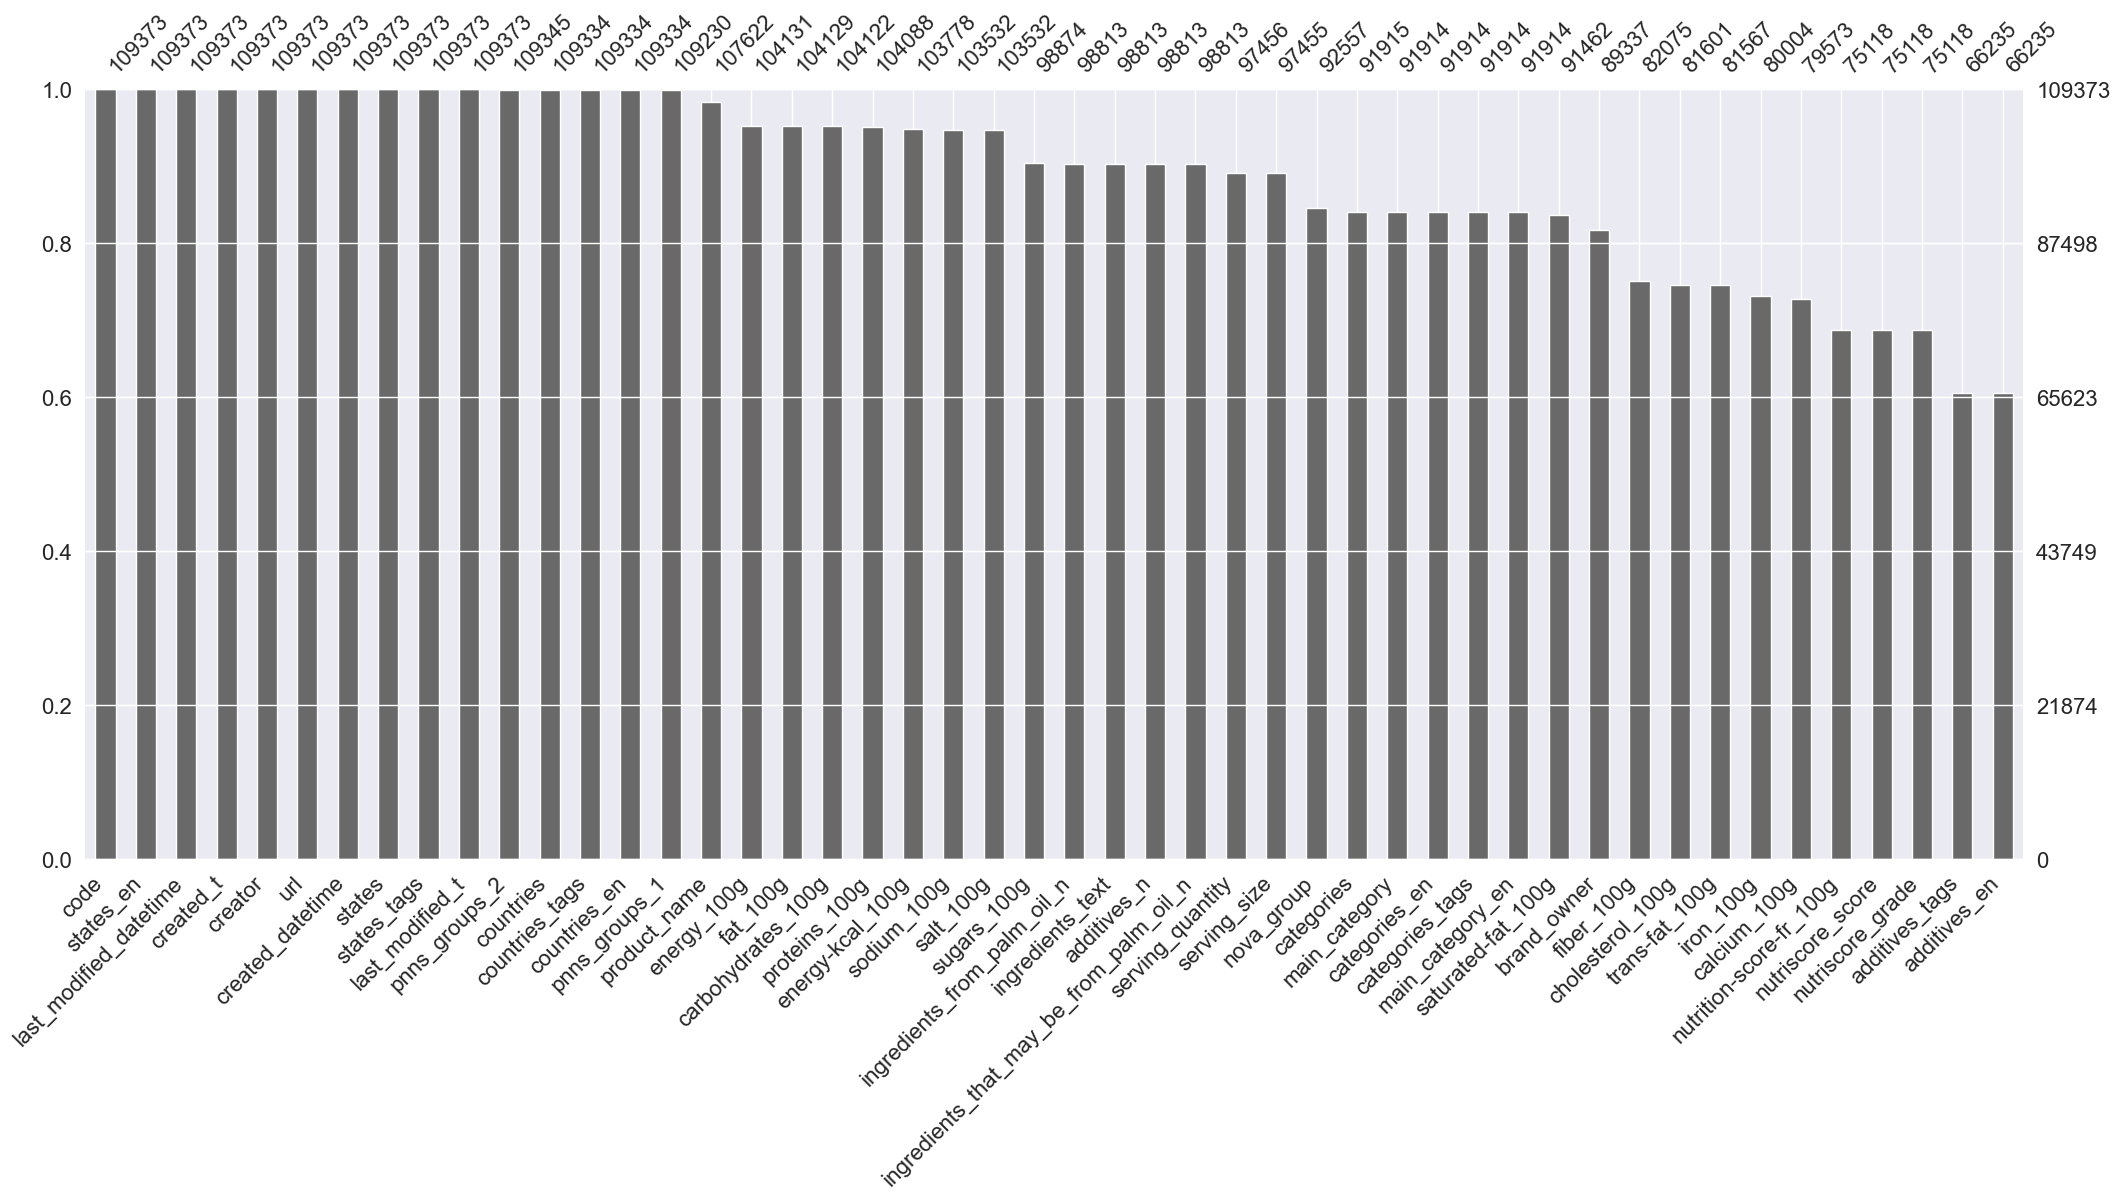

In [44]:
msno.bar(Data , labels=True , sort = 'descending')

In [47]:
Data['energy-kcal_100g'].isna().sum()

5595

In [49]:
Data.drop(columns=["energy-kcal_100g"], inplace=True)

<Axes: >

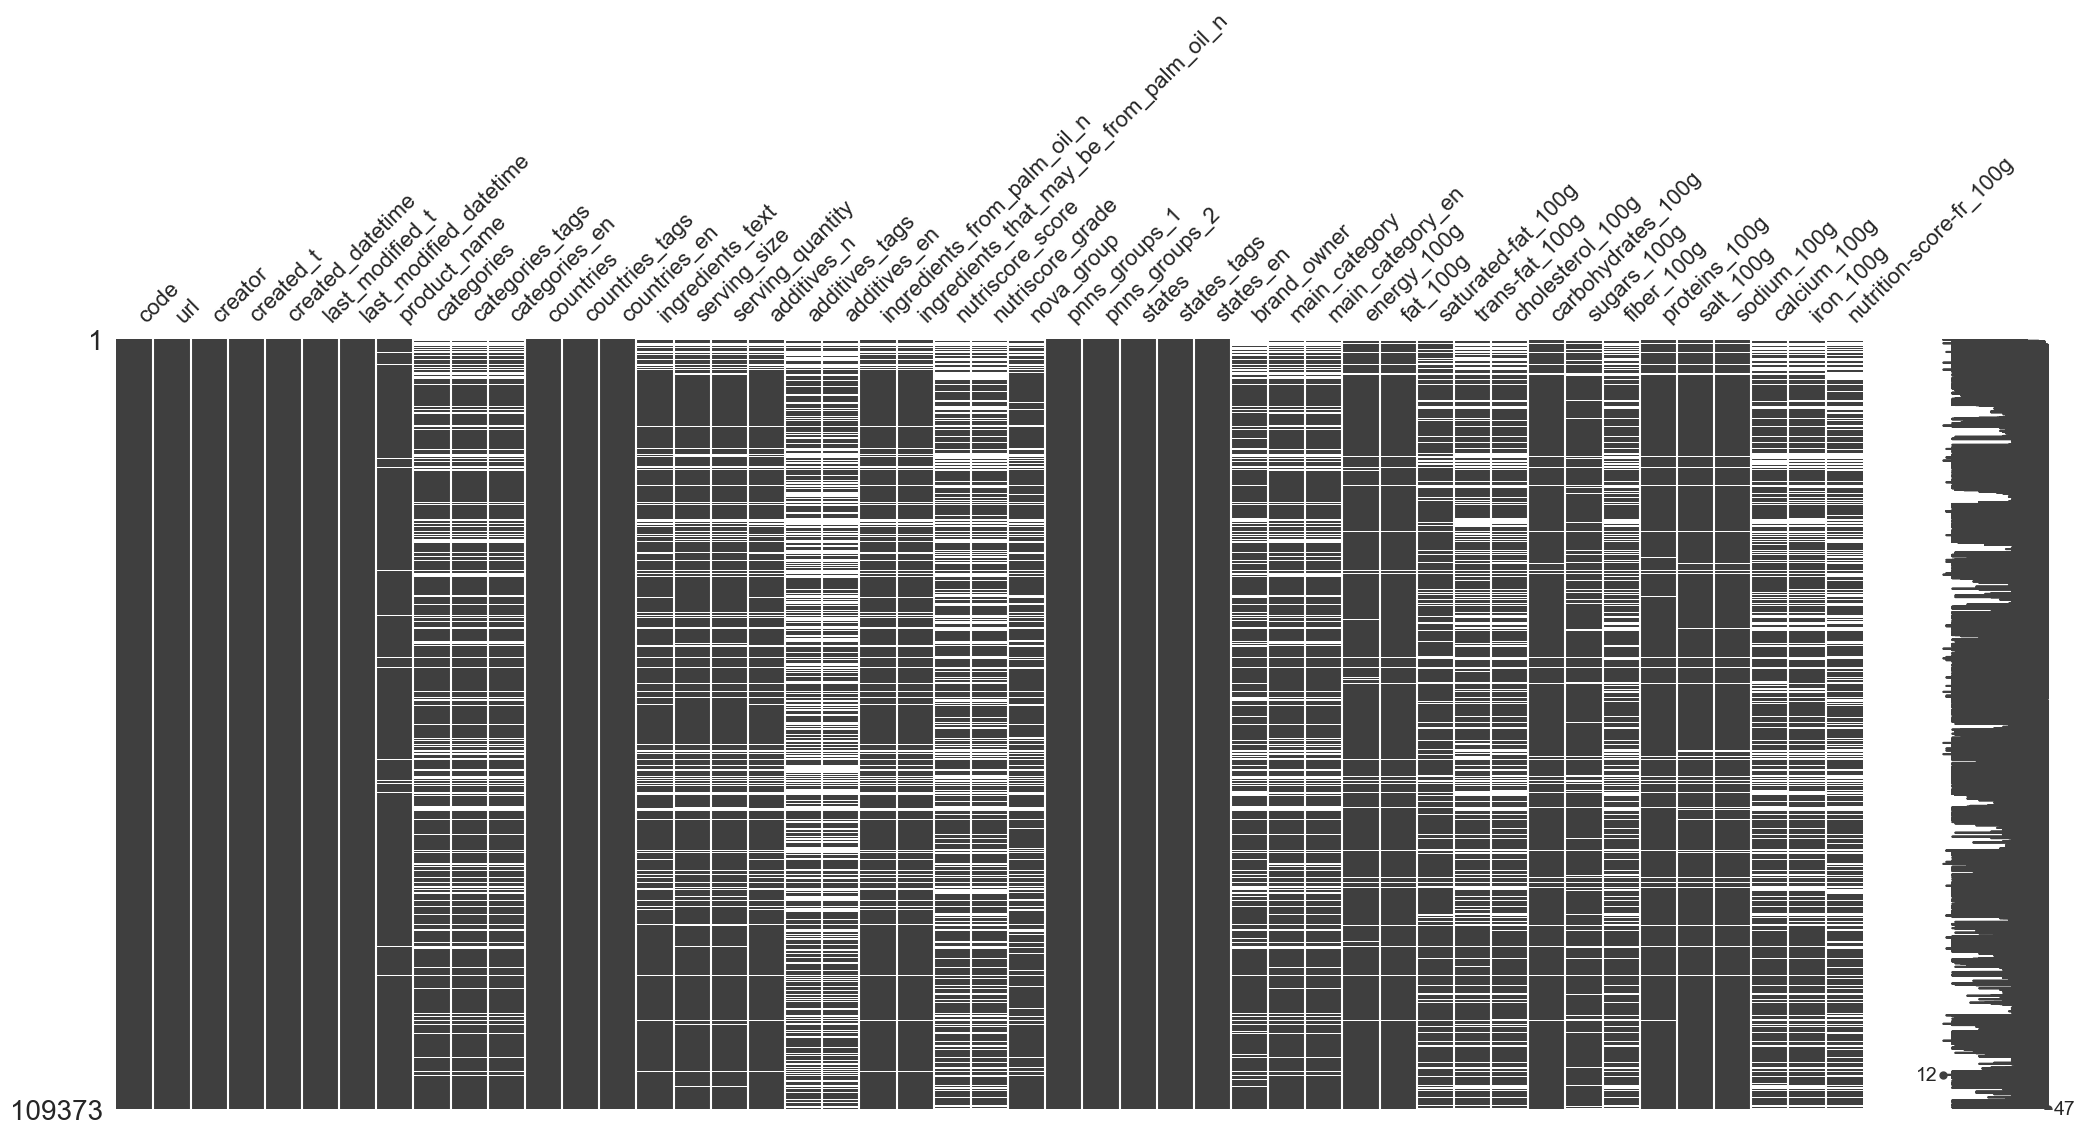

In [50]:
msno.matrix(Data)

<Axes: >

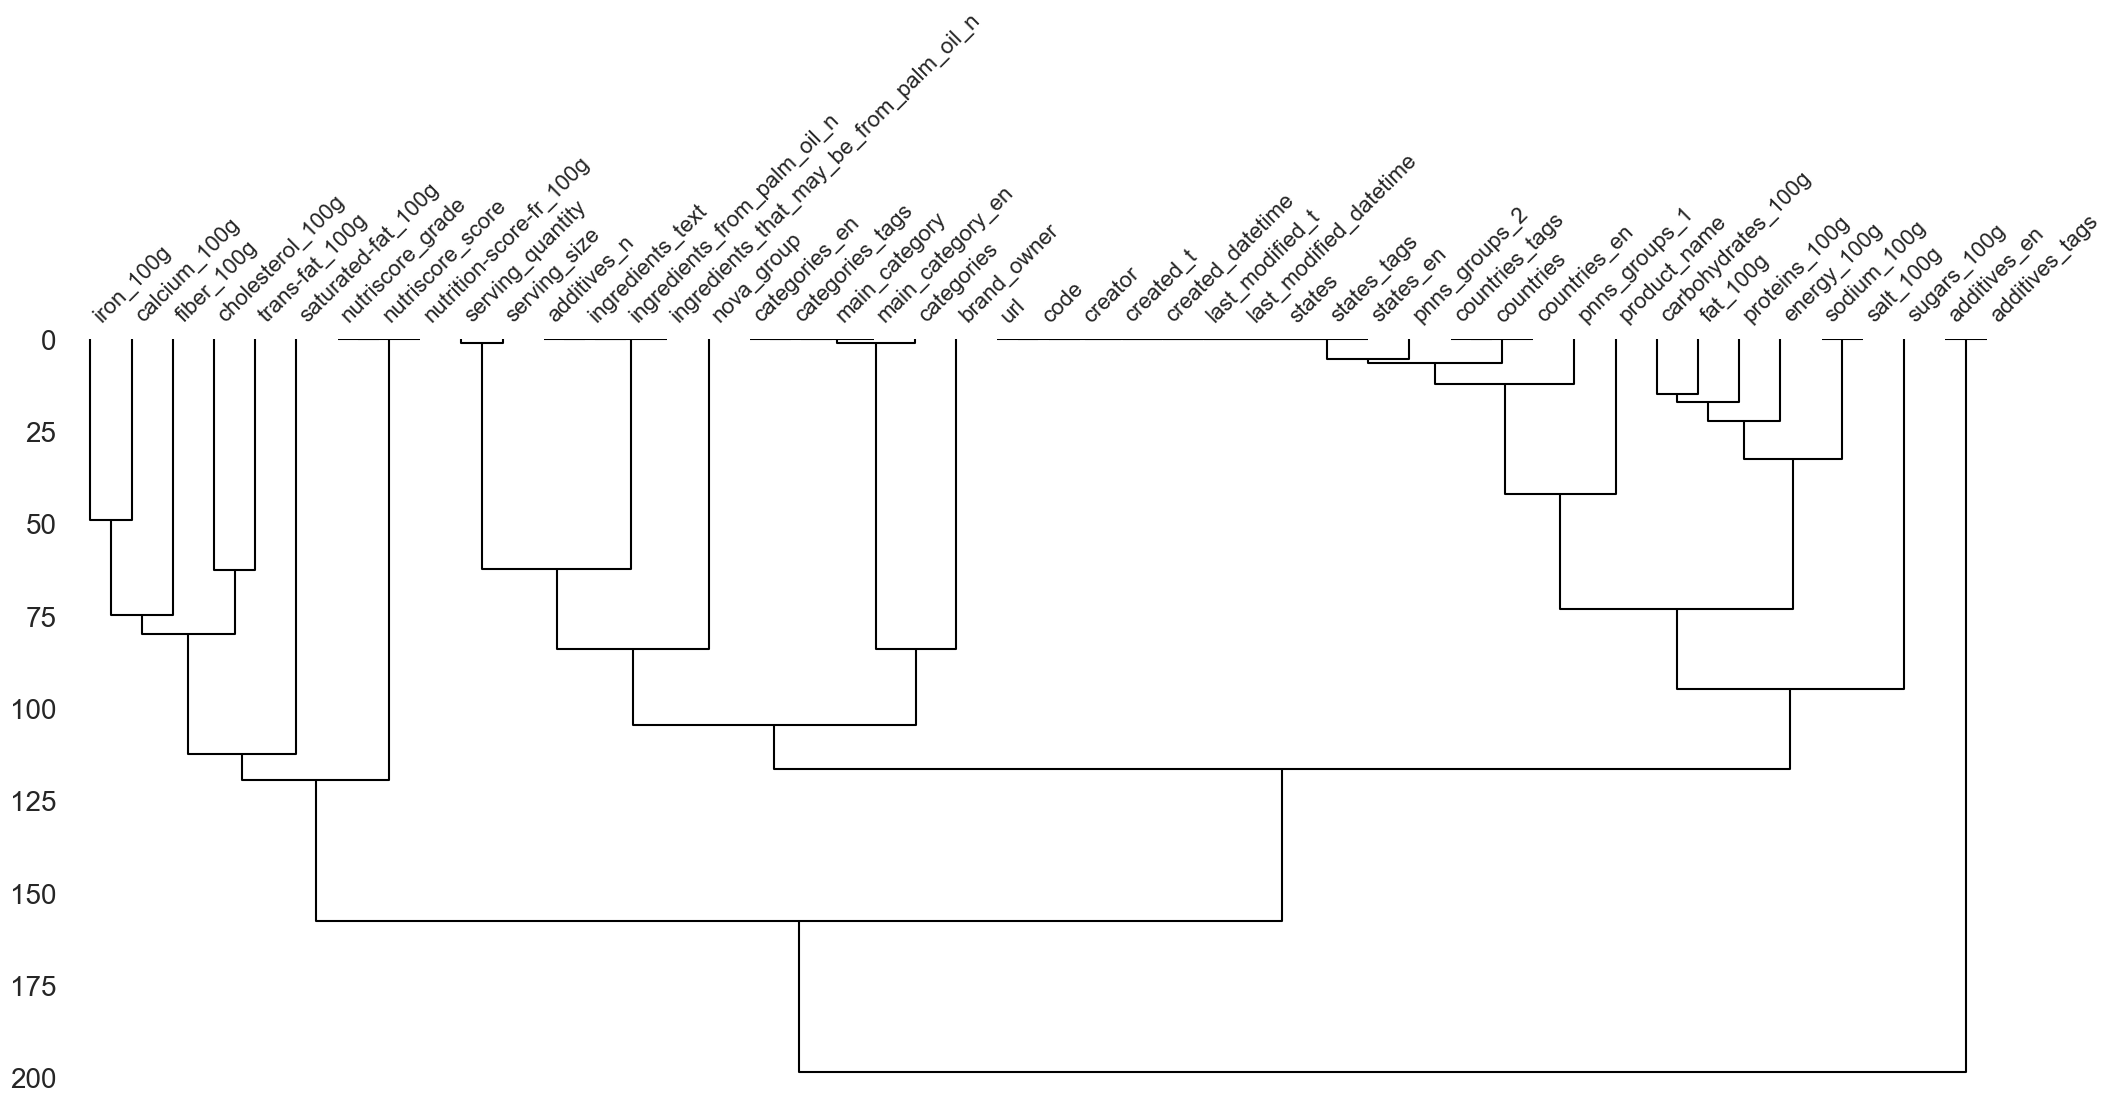

In [51]:
msno.dendrogram(Data) 

In [72]:
Data["taux_remplissage"] = Data.notnull().sum(axis=1) / Data.shape[1]

<Axes: ylabel='Frequency'>

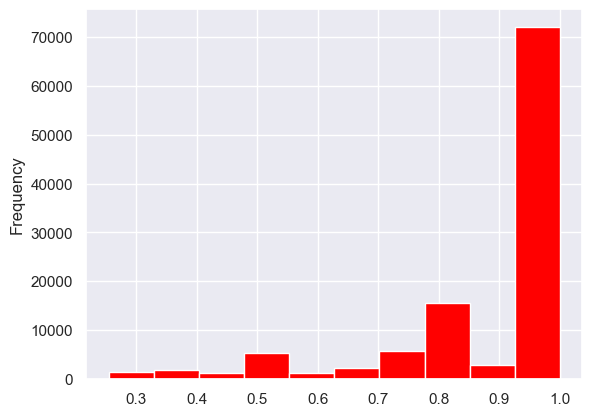

In [62]:
Data["taux_remplissage"].sort_values().plot(kind='hist',color = 'red')

In [75]:
Data = Data[Data.taux_remplissage >0.40 ]
Data.drop(columns=["taux_remplissage"], inplace=True)
Data.shape

(106312, 47)

On remarque ci-dessus qu'on avait presque éliminer 3000 observation parmi 109000 qui est environ 0.03

<Axes: >

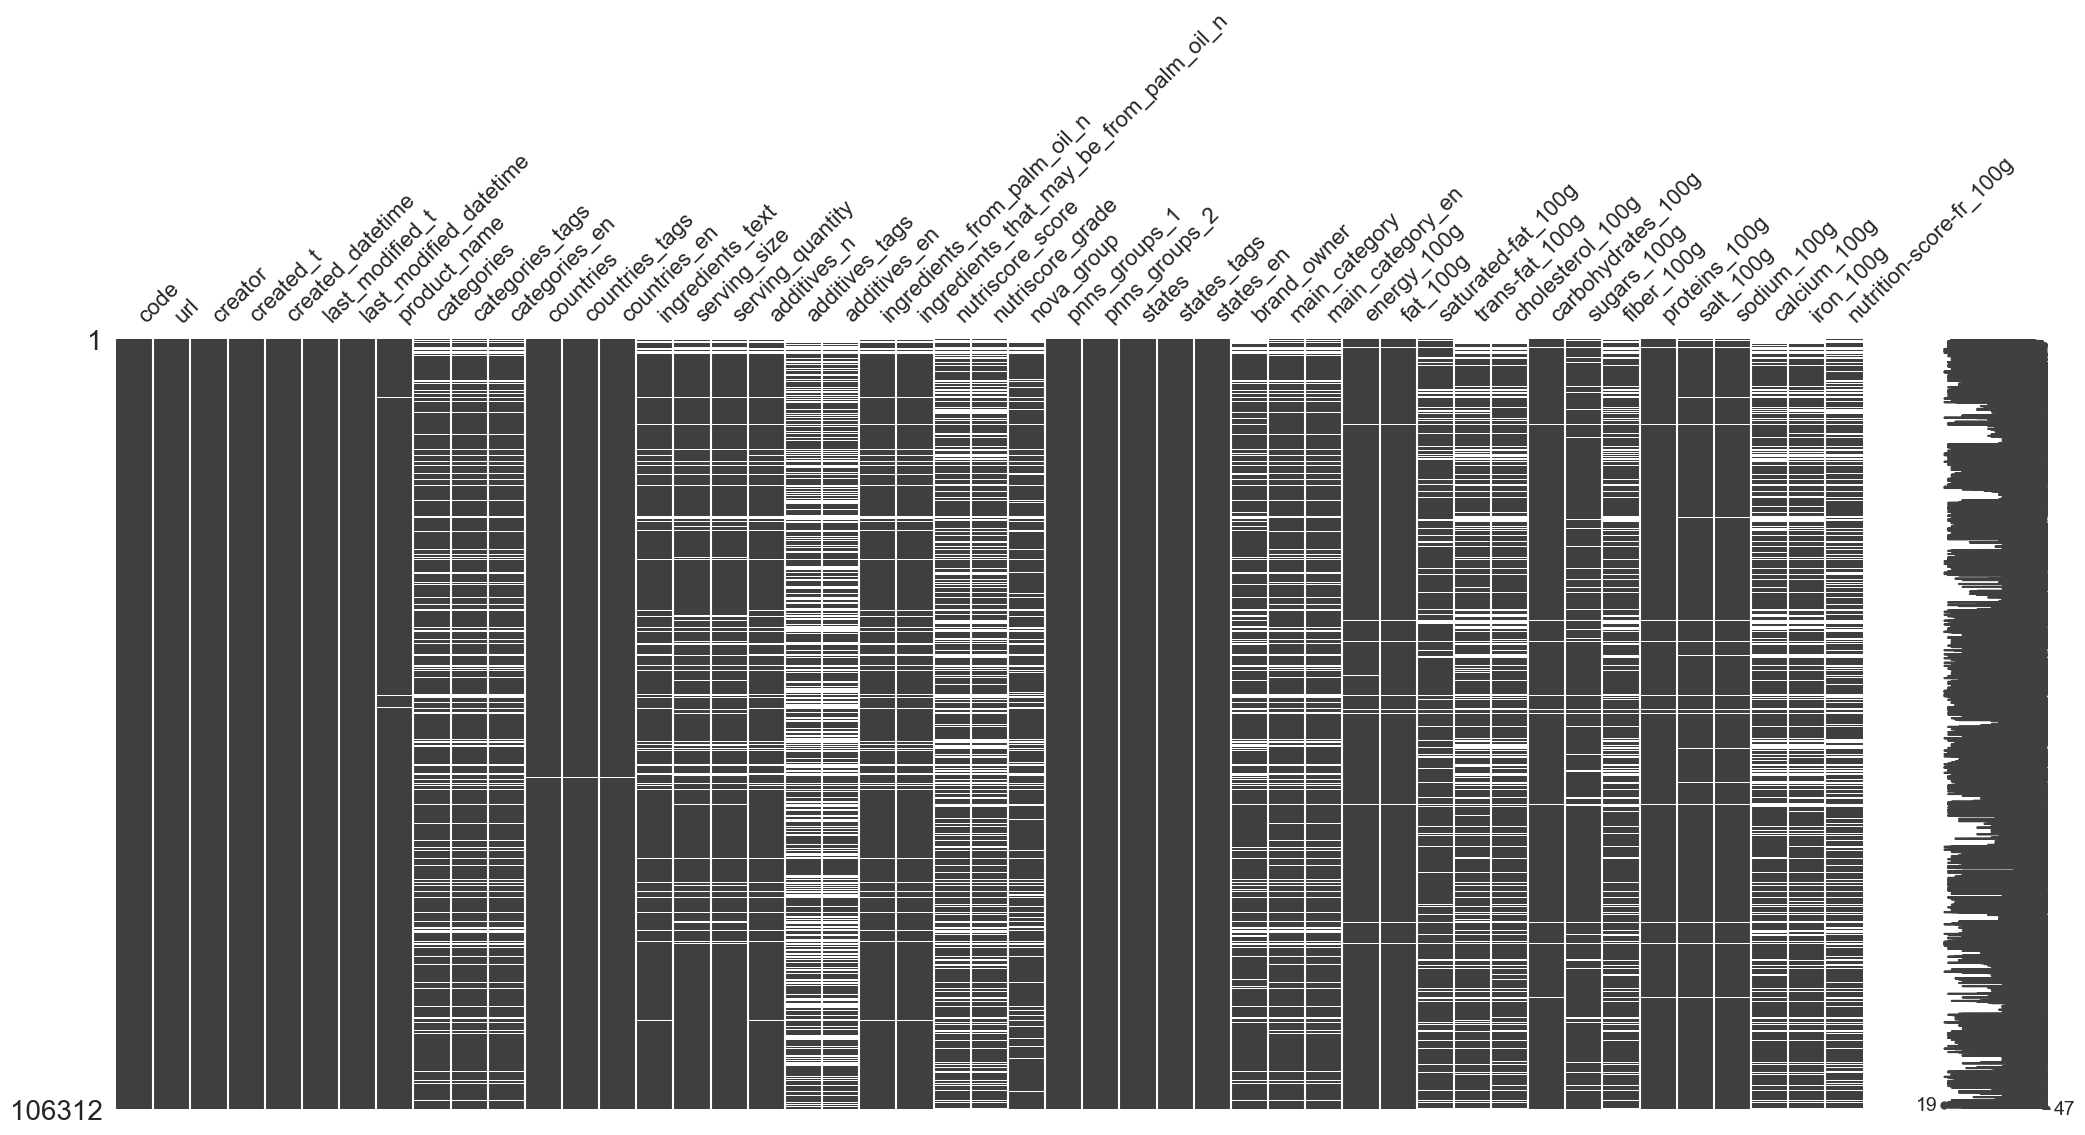

In [77]:
msno.matrix(Data)

# Analyser la correlation entre lesvaleurs manquantes

<Axes: >

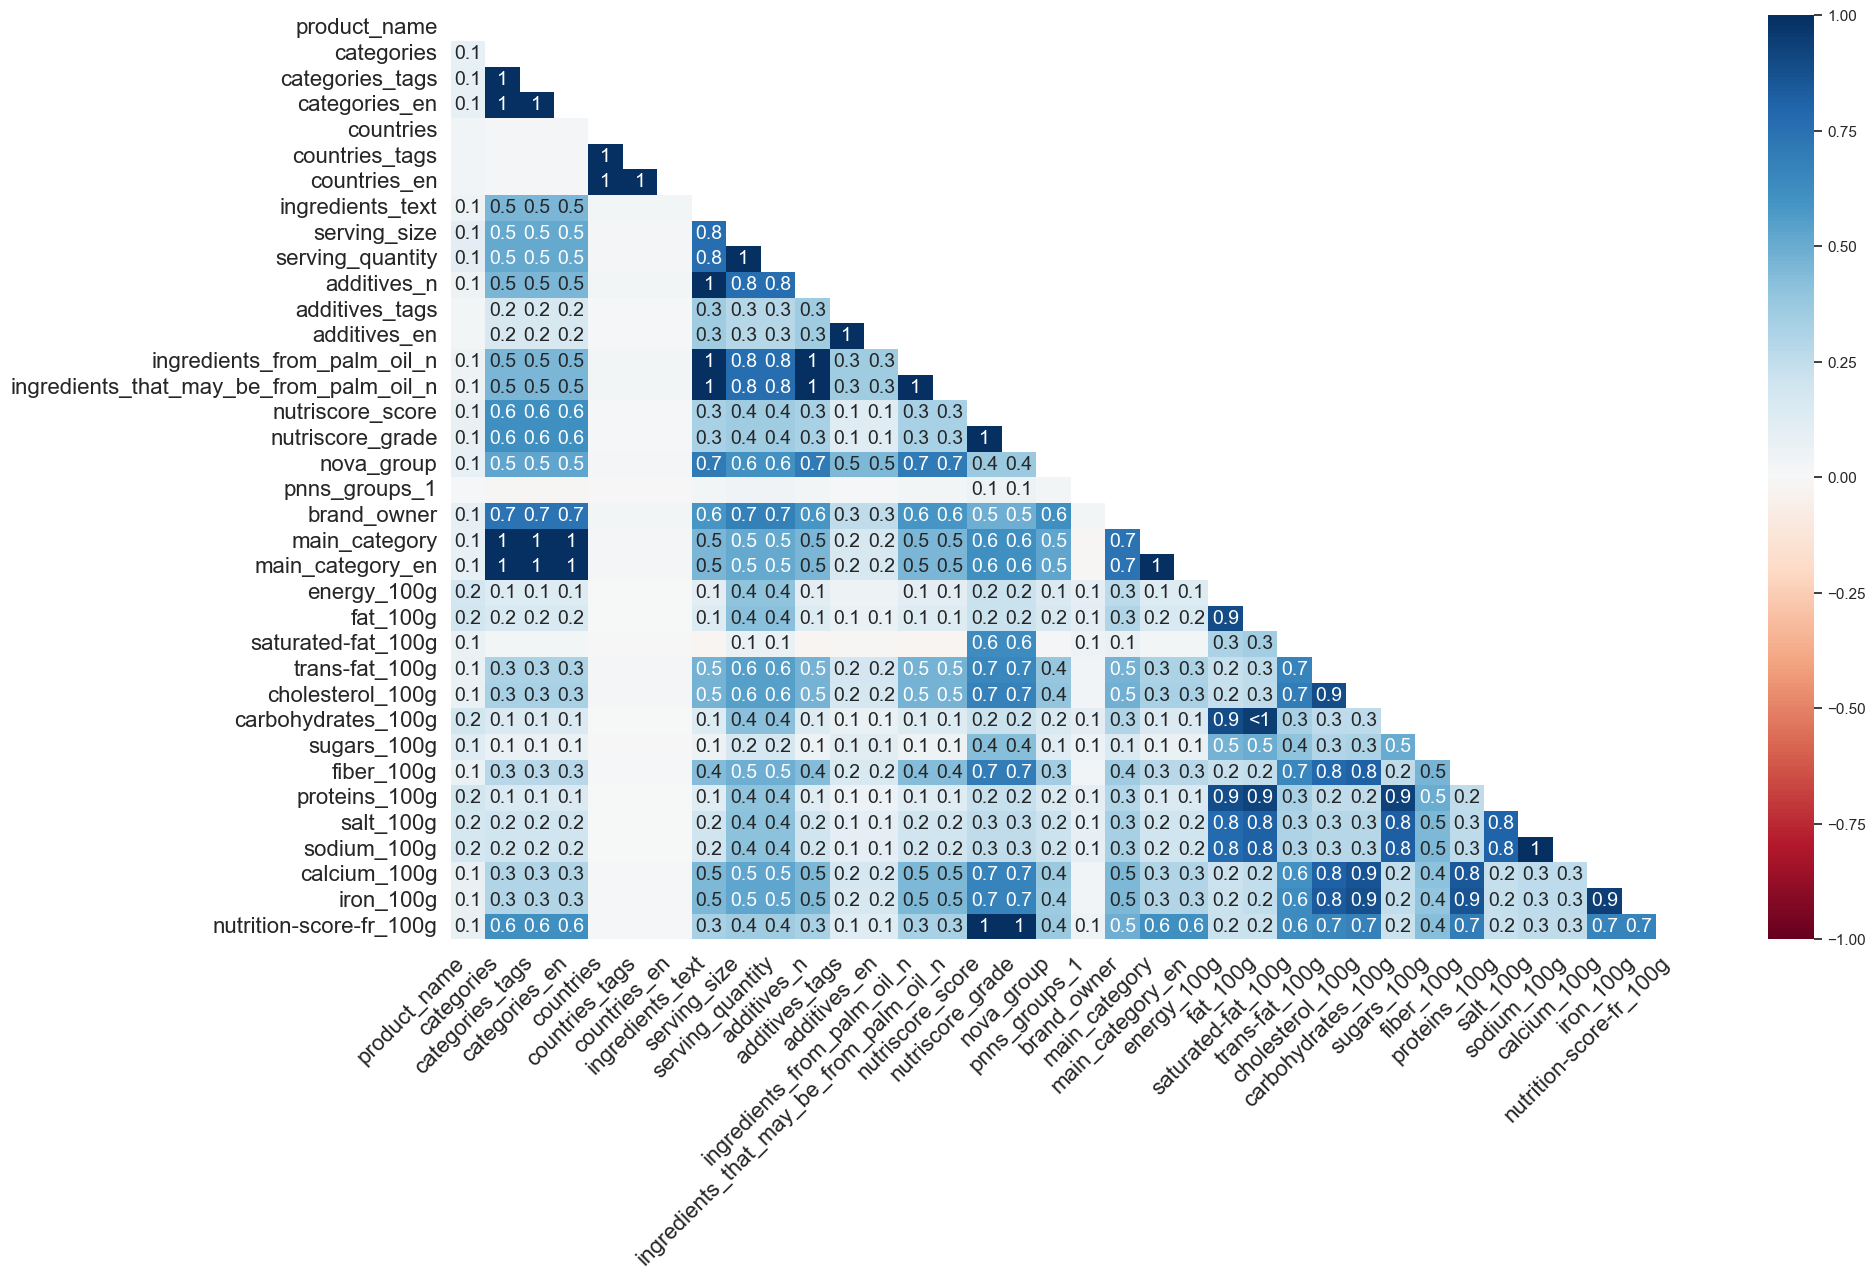

In [78]:
msno.heatmap(Data)

# Nettoyage métier

In [80]:
col_to_exclude = ["nutrition-score-fr_100g","energy_100g"]
nutriments = [col for col in Data.columns if col.endswith("_100g") and col not in col_to_exclude]
nutriments

['fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'calcium_100g',
 'iron_100g']

<Axes: >

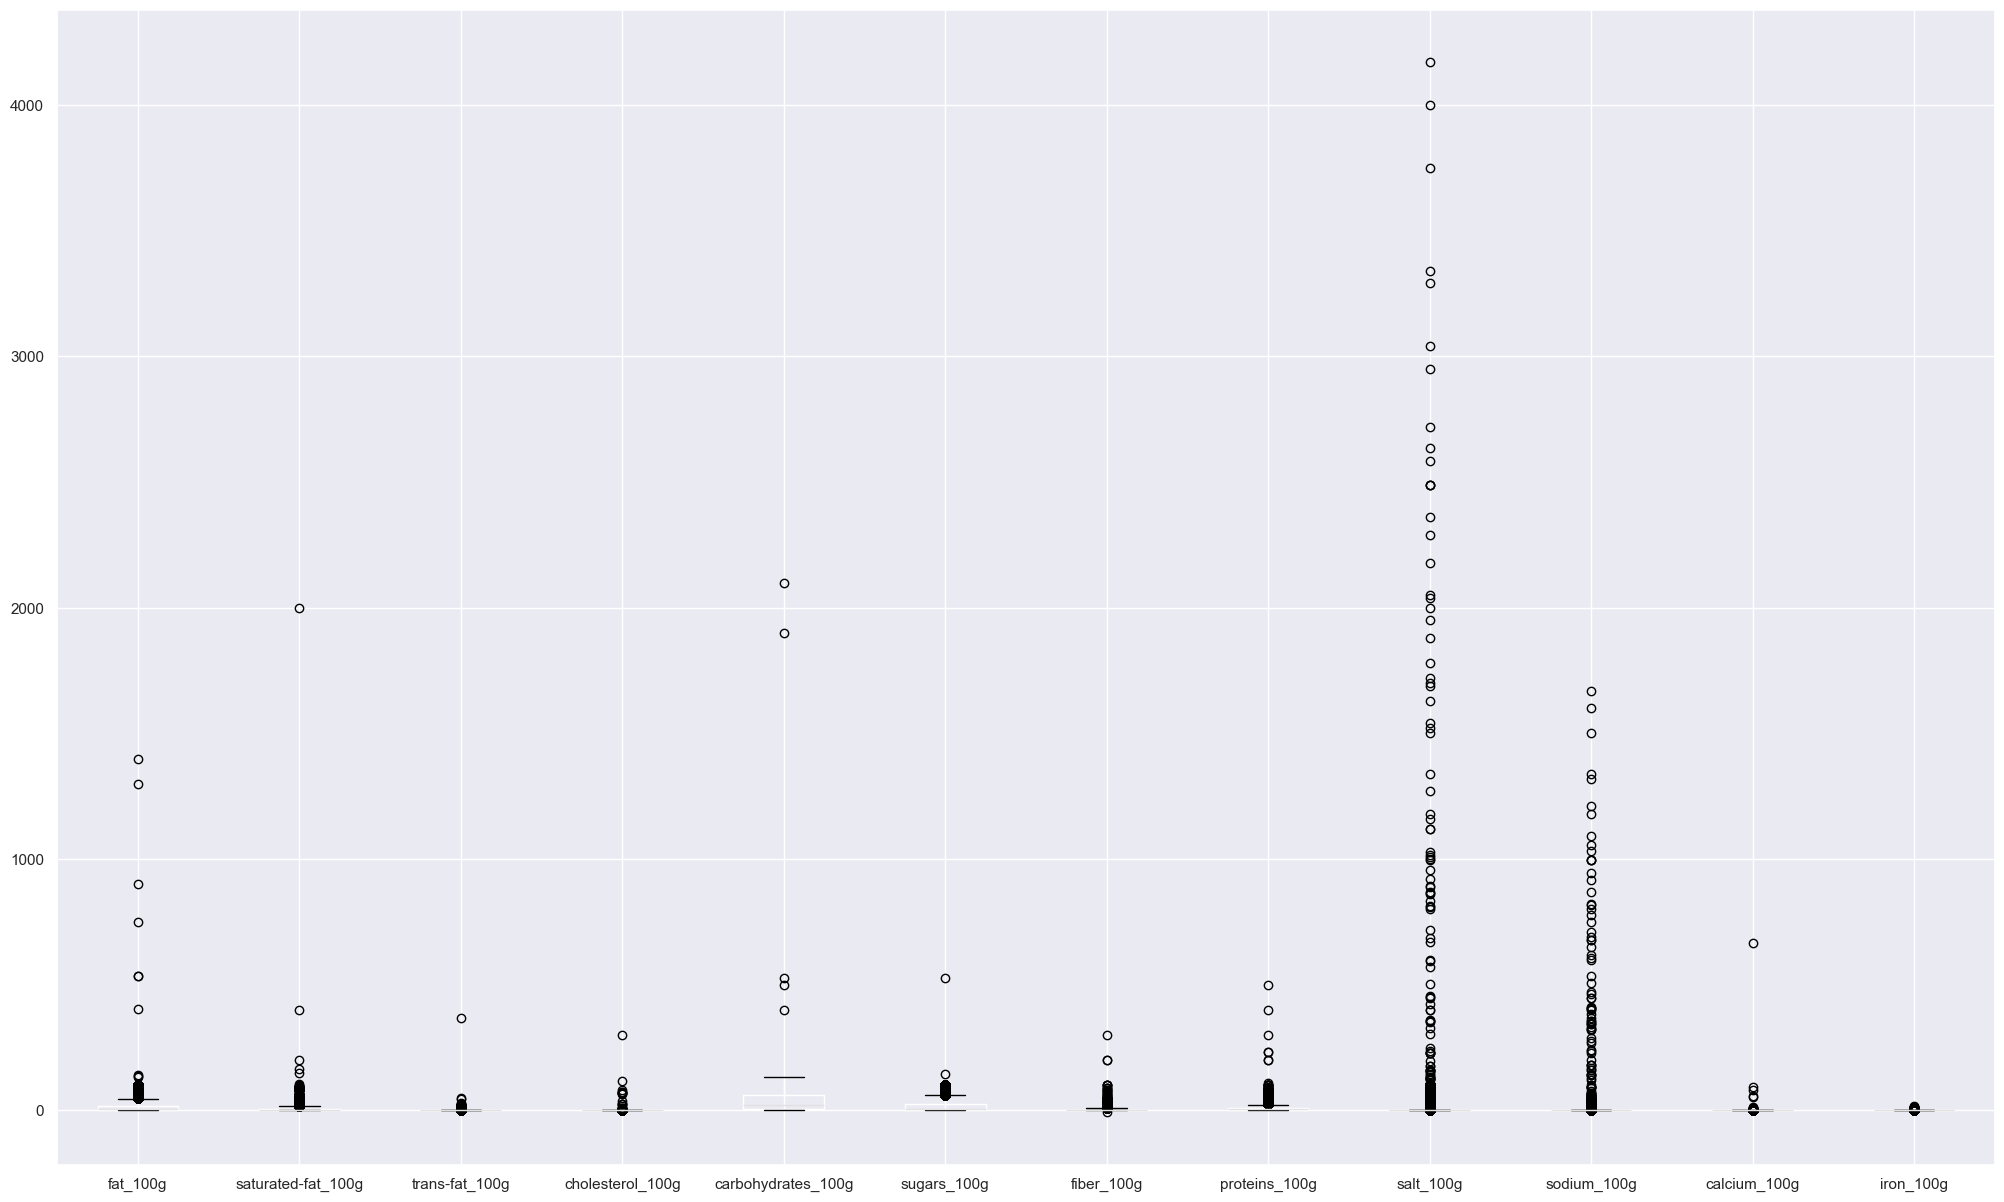

In [81]:
Data.boxplot(column=nutriments, figsize=(25,15))

<Axes: >

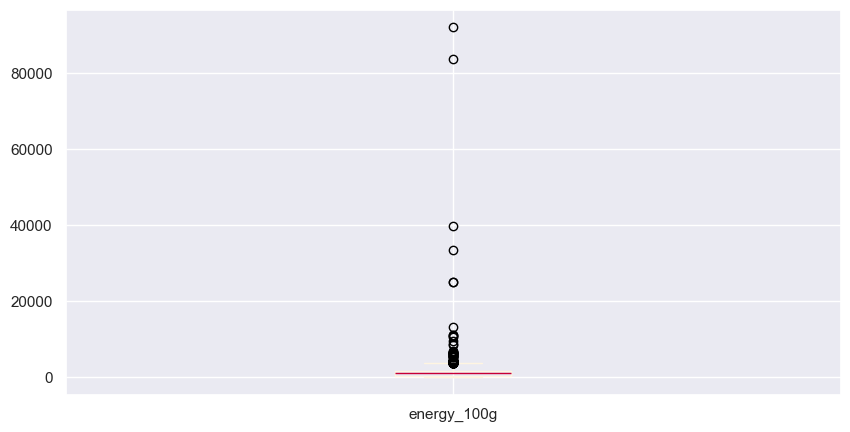

In [83]:
Data.energy_100g.plot.box(figsize=(10,5))

In [85]:
Data_cleaned = Data.copy(deep=True)

### Nettoyage métier pour l'énergie

Le lipide est le nutriment avec le plus d'energie et contient 3700 kj sur 100g

In [87]:
Data_cleaned.shape

(106312, 47)

In [88]:
Data_cleaned = Data_cleaned[(Data_cleaned.energy_100g > 0) & (Data_cleaned.energy_100g < 3700)]


In [89]:
Data_cleaned.shape

(99249, 47)

<Axes: >

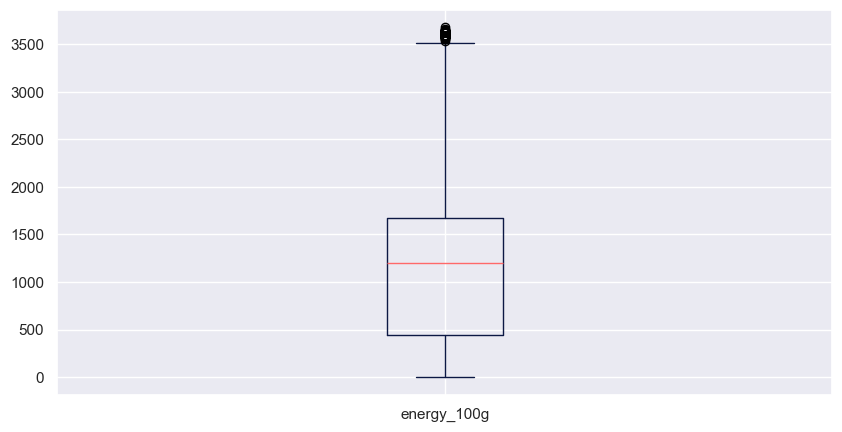

In [94]:
Data_cleaned.energy_100g.plot.box(figsize=(10,5))

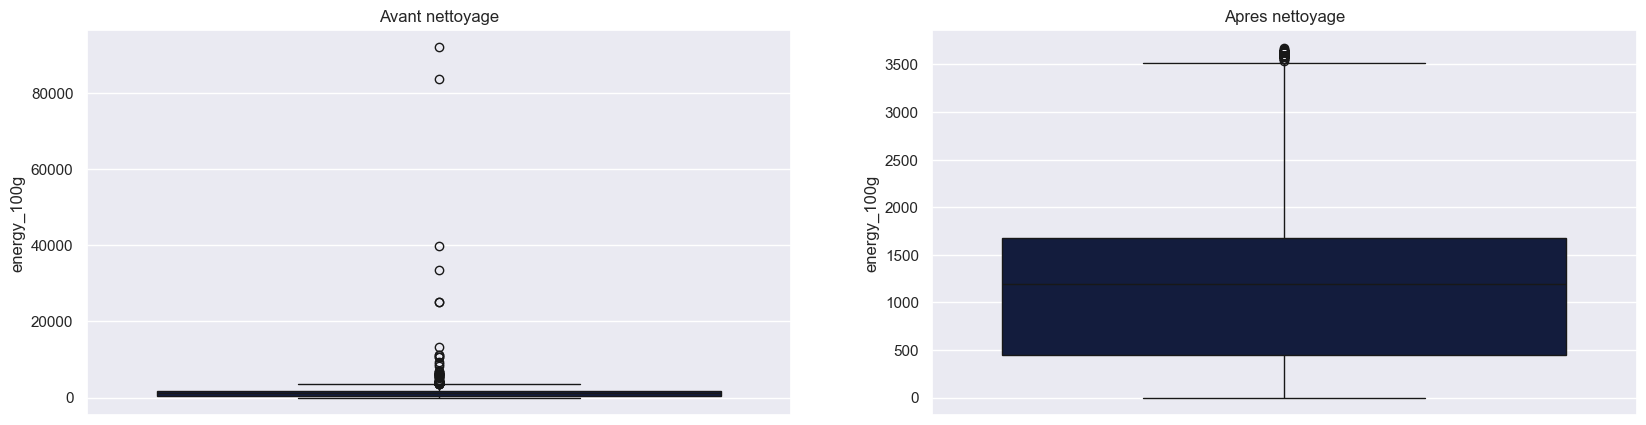

In [95]:
fig,axes = plt.subplots(1,2, figsize=(20,5))
sns.boxplot(Data.energy_100g,ax=axes[0]).set(title="Avant nettoyage")
_=sns.boxplot(Data_cleaned.energy_100g,ax=axes[1]).set(title="Apres nettoyage")

In [105]:
Data_cleaned.columns = [col.replace("-","_") for col in Data_cleaned.columns]
Data_cleaned.head()


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,categories,categories_tags,...,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g,nutrition_score_fr_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15 10:38:00+00:00,1561463718,2019-06-25 11:55:18+00:00,Vitória crackers,NaN,NaN,...,NaN,70.1,15.0,NaN,7.8,1.40,0.560,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11 14:09:21+00:00,1444659212,2015-10-12 14:13:32+00:00,moutarde au moût de raisin,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards",...,NaN,29.0,22.0,0.0,5.1,4.60,1.840,NaN,NaN,18.0
6,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17 12:05:32+00:00,1542456333,2018-11-17 12:05:33+00:00,Mini coco,NaN,NaN,...,NaN,10.0,3.0,NaN,2.0,1.15,0.460,NaN,NaN,NaN
13,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11 10:00:13+00:00,1565268412,2019-08-08 12:46:52+00:00,Salade de carottes râpées,"Plats préparés, Légumes préparés, Carottes râp...","en:meals,en:prepared-vegetables,en:grated-carr...",...,NaN,5.3,3.9,NaN,0.9,0.42,0.168,NaN,NaN,1.0
14,0000000000970,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1520506368,2018-03-08 10:52:48+00:00,1561463726,2019-06-25 11:55:26+00:00,Fromage blanc aux myrtilles,NaN,NaN,...,NaN,16.3,16.3,NaN,4.4,0.25,0.100,NaN,NaN,NaN


In [107]:
nutriments = [col.replace("-","_") for col in nutriments]
nutriments

['fat_100g',
 'saturated_fat_100g',
 'trans_fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'calcium_100g',
 'iron_100g']

In [108]:
for col in nutriments:
    Data_cleaned = Data_cleaned.query(f'{col} > 0 and {col} < 100')
    print(col, " => ", Data_cleaned.shape)

fat_100g  =>  (70322, 47)
saturated_fat_100g  =>  (56244, 47)
trans_fat_100g  =>  (1749, 47)
cholesterol_100g  =>  (1144, 47)
carbohydrates_100g  =>  (1032, 47)
sugars_100g  =>  (984, 47)
fiber_100g  =>  (808, 47)
proteins_100g  =>  (808, 47)
salt_100g  =>  (807, 47)
sodium_100g  =>  (807, 47)
calcium_100g  =>  (732, 47)
iron_100g  =>  (719, 47)


<Axes: >

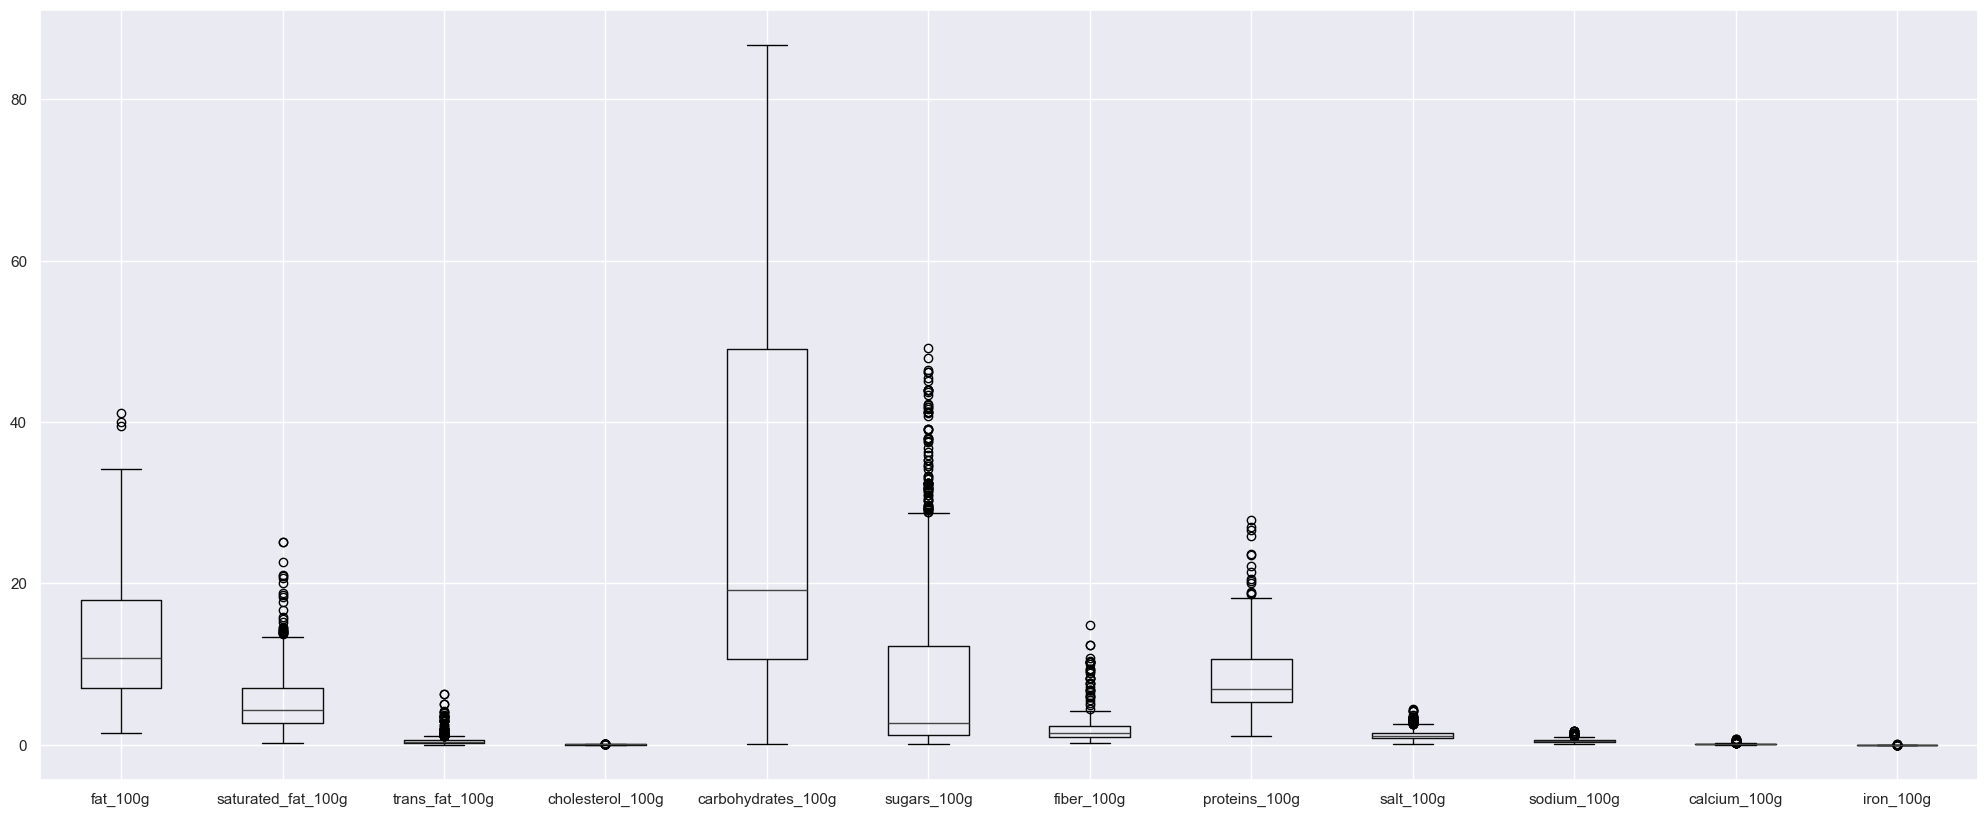

In [110]:
Data_cleaned.boxplot(column=nutriments ,figsize=(25,10))

<Axes: >

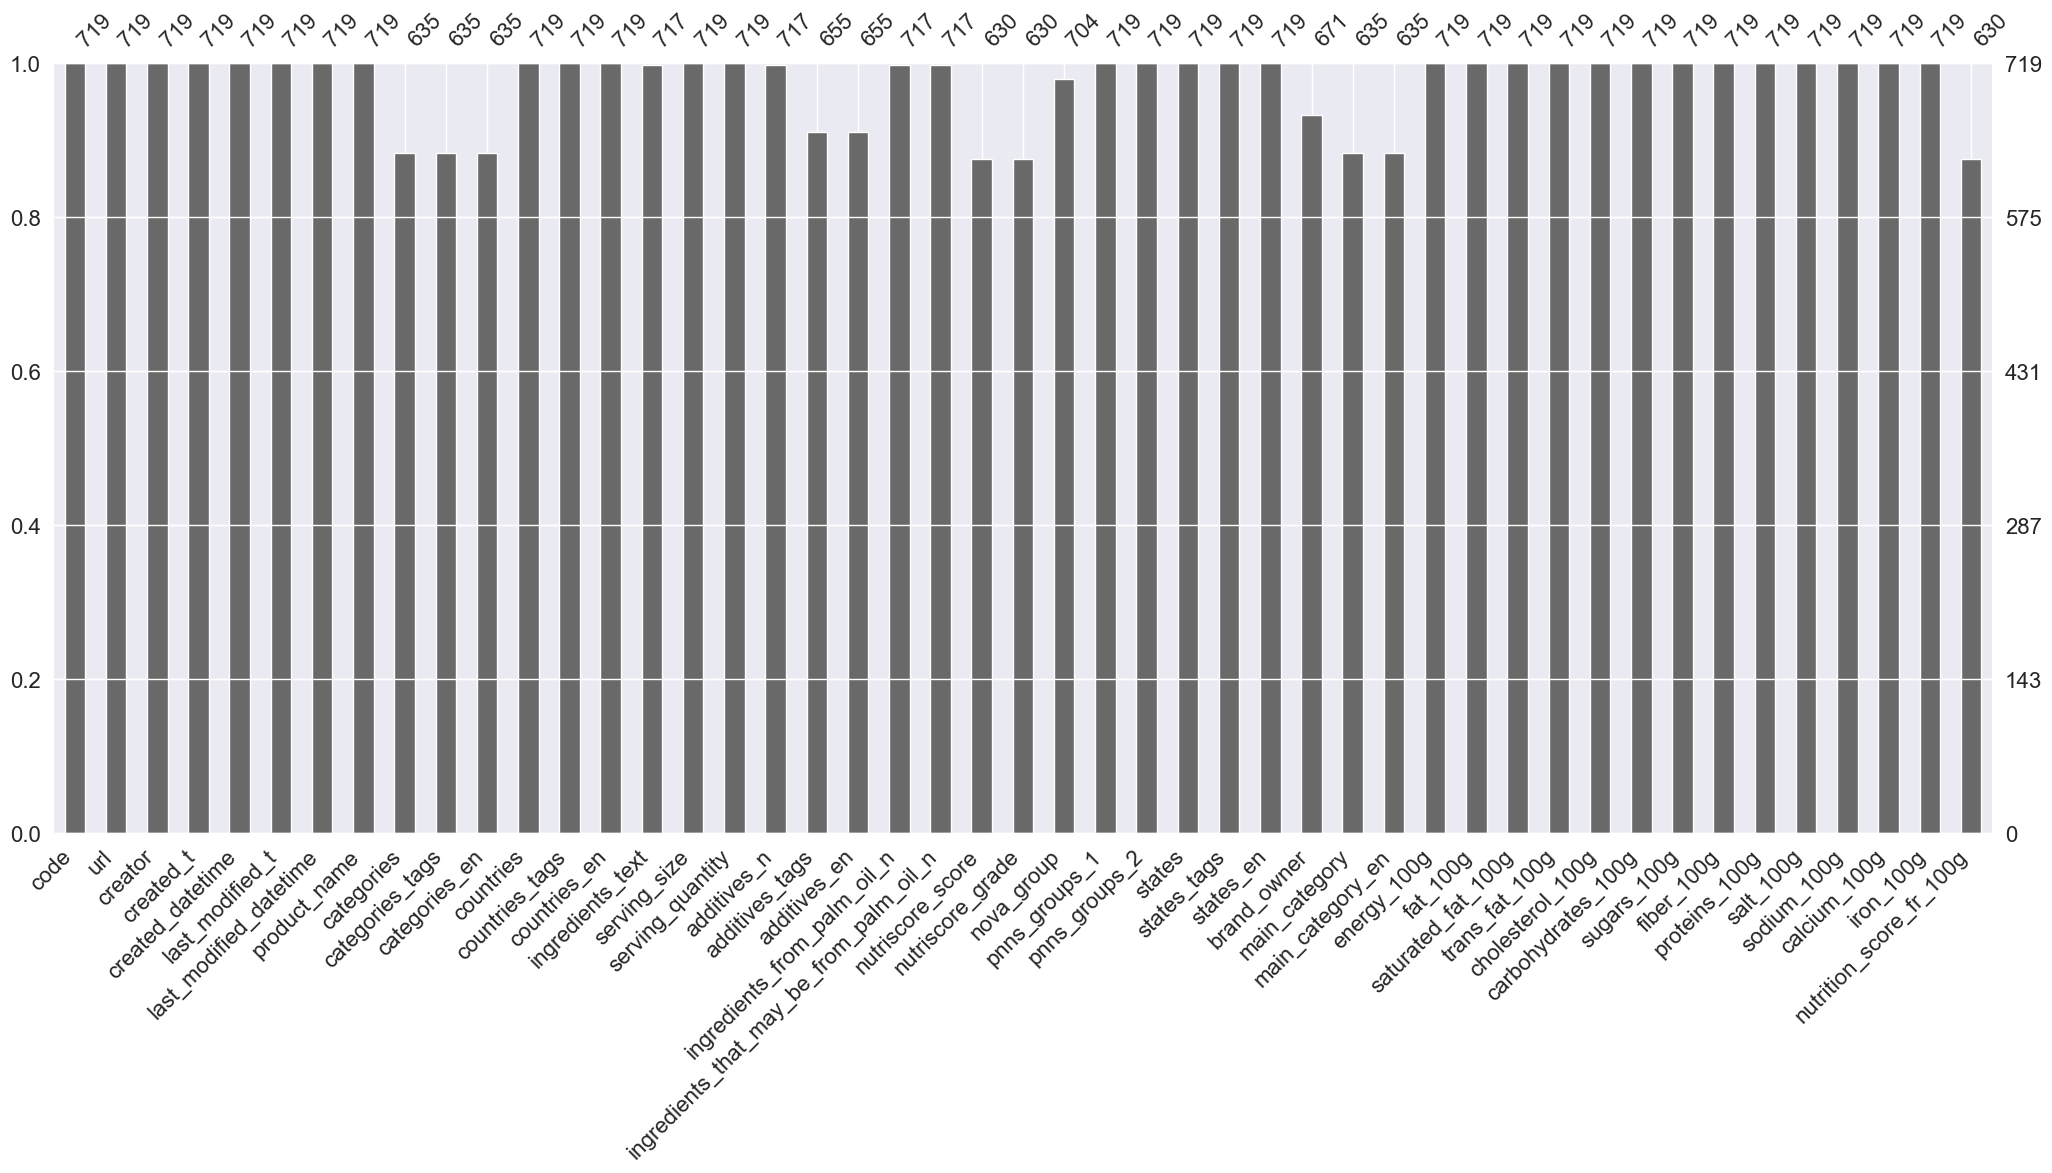

In [111]:
msno.bar(Data_cleaned)

In [112]:
Data_cleaned.shape

(719, 47)

# Nettoyage Statistique

In [113]:
def delete_outliers (col,df):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df.query(f"{col} > {q1 - iqr * 1.5} and {col} < {q3 + iqr * 1.5}")

In [121]:
Data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 355 to 109243
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype              
---  ------                                   --------------  -----              
 0   code                                     719 non-null    object             
 1   url                                      719 non-null    object             
 2   creator                                  719 non-null    object             
 3   created_t                                719 non-null    int64              
 4   created_datetime                         719 non-null    datetime64[ns, UTC]
 5   last_modified_t                          719 non-null    int64              
 6   last_modified_datetime                   719 non-null    datetime64[ns, UTC]
 7   product_name                             719 non-null    object             
 8   categories                               635 non-null    object       

# Identifier les colonnes numériques

In [122]:
def get_num_columns(df):
    num_columns = df.select_dtypes(include=["float64"]).columns
    return list(num_columns)

In [125]:
numeric_col = get_num_columns(Data_cleaned)
numeric_col

['serving_quantity',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutriscore_score',
 'nova_group',
 'energy_100g',
 'fat_100g',
 'saturated_fat_100g',
 'trans_fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition_score_fr_100g']

In [126]:
false_num_columns = ["ingredients_that_may_be_from_palm_oil_n", "ingredients_from_palm_oil_n", "nova_group"]
for col in false_num_columns:
    print(Data_cleaned[col].unique())

[ 0.  1. nan]
[ 0.  1. nan]
[ 4. nan  3.  1.]


In [127]:
Data_cleaned[false_num_columns] = Data_cleaned[false_num_columns].astype("category")

In [128]:
Data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 355 to 109243
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype              
---  ------                                   --------------  -----              
 0   code                                     719 non-null    object             
 1   url                                      719 non-null    object             
 2   creator                                  719 non-null    object             
 3   created_t                                719 non-null    int64              
 4   created_datetime                         719 non-null    datetime64[ns, UTC]
 5   last_modified_t                          719 non-null    int64              
 6   last_modified_datetime                   719 non-null    datetime64[ns, UTC]
 7   product_name                             719 non-null    object             
 8   categories                               635 non-null    object       

In [130]:
numeric_col = list(set(numeric_col).difference(set(false_num_columns)))


In [131]:
numeric_col

['sugars_100g',
 'salt_100g',
 'nutriscore_score',
 'sodium_100g',
 'cholesterol_100g',
 'calcium_100g',
 'iron_100g',
 'proteins_100g',
 'nutrition_score_fr_100g',
 'trans_fat_100g',
 'additives_n',
 'saturated_fat_100g',
 'carbohydrates_100g',
 'fiber_100g',
 'serving_quantity',
 'fat_100g',
 'energy_100g']